## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
mouse_data_results_df= pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_data_results_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice.
mice = mouse_data_results_df["Mouse ID"].value_counts()
number_of_mice = len(mice)
# Print test
number_of_mice


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#loc will grab rows in the dataframe where my index label is Mouse ID.
#Duplicated.subset will return values for rows that are duplicated while shuffling through Mouse ID and Timpoint.
#.Unique() will return distinct values.
duplicate_mice = mouse_data_results_df.loc[mouse_data_results_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
# Print test
duplicate_mice


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data_duplicates = mouse_data_results_df.duplicated()
duplicates = mouse_data_results_df[all_data_duplicates]
# Print test
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data_results_df[mouse_data_results_df['Mouse ID'].isin(duplicate_mice)==False]
# Print test
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice = clean_df["Mouse ID"].value_counts()
number_of_new_mice = len(new_mice)
# Print test
number_of_new_mice


248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# First, grab mean, median, variance, SD and SEM of the Column Tumor Volume in the dataset by grouping by on the Drug Regimen column. 

dataset_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
# Print test
dataset_mean

dataset_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
# Print test
dataset_median

dataset_variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
# Print test
dataset_variance

dataset_sd = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
# Print test
dataset_sd

dataset_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# Print test
dataset_sem

# Now, dumping data in a simgle summary dataframe. 
dataset_summary_df = pd.DataFrame({"Mean": dataset_mean, "Median": dataset_median, "Variance": dataset_variance, "Standard Deviation": dataset_sd,
                                 "Standard Error of the Mean": dataset_sem})

# Print test
dataset_summary_df


,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
other_summary = clean_df.groupby('Drug Regimen')
#Print test
other_summary
# Using the aggregation method, produce the same summary statistics in a single line
other_dataset_summary = other_summary.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
# Print test
other_dataset_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

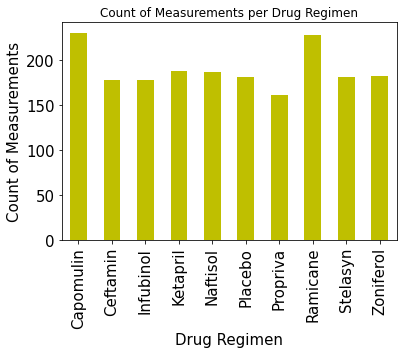

In [64]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# x-axis will hold the name of distinct names of drug regimen, Y-axis will hold the measurements values
# First grab total count (not sure if I need to grab from the original merge dataset or the clean dataset)

measurements_total = mouse_data_results_df.groupby(["Drug Regimen"]).count()["Weight (g)"] 
measurements_total

# Plotting

plotting_pandas = measurements_total.plot.bar(color='y', fontsize = 15)
# Print test
# measurements_total
#Plot beautification
plt.xlabel("Drug Regimen", fontsize = 15)
plt.ylabel("Count of Measurements", fontsize = 15)
plt.title("Count of Measurements per Drug Regimen")
# Print test
plt.show()

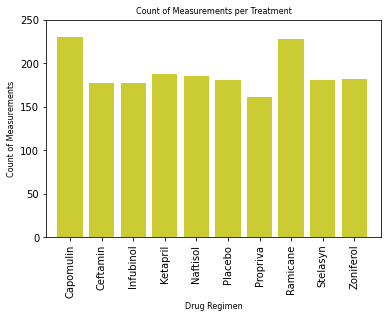

In [142]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Create a range for my Y-axis which is counts of meeasurements
measurements = (mouse_data_results_df.groupby(["Drug Regimen"])["Weight (g)"].count()).tolist()
measurements

# Plotting
x_axis = np.arange(len(measurements_total ))

# Bar plot with the length of the measurement series created
plt.bar(x_axis, measurements, color='y', alpha=0.8, align='center')
# Create ticks by looping through the lenght of the measurement counts. 
tick_locations = [value for value in x_axis]
# Match tick values to name of drug regimen
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

# Set my limits for X and Y axis
plt.xlim(-0.75, 9.85)
plt.ylim(0, 250)

# Plot beautification
plt.title("Count of Measurements per Treatment",fontsize = 8)
plt.xlabel("Drug Regimen",fontsize = 8)
plt.ylabel("Count of Measurements",fontsize = 8)
plt.show()


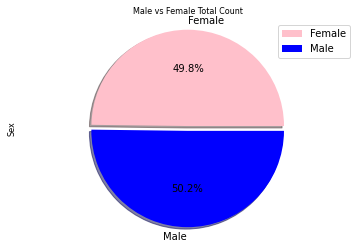

In [141]:
# Generate a pie plot showing the distribution of female versus male mice using pandas (need to get % per sex)
# Need to group dataset by Mouse ID and gender and drop this data in a dataframe and count the number of element in it by using .size
gender_dataset = mouse_data_results_df.groupby(["Mouse ID", "Sex"])
gender_df = pd.DataFrame(gender_dataset.size())
# Print test
gender_df

# Need another dataframe with the total count for each gender only and name Count column [Total Count]
count_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
count_gender.columns = ["Total Count"]
# Print test
count_gender

# Need percentage of female vs male
count_gender["Total Percentage"] = (count_gender["Total Count"]/count_gender["Total Count"].sum())*100

# Print test
count_gender


# ---------------------------------------------------------------------------------------------------------------
# Plotting
colors = ['pink', 'blue']
explode = (0.05, 0)
plot = count_gender.plot.pie(y='Total Count', colors=colors, explode=explode, shadow = True, autopct="%1.1f%%")

# Plot Beautification
plt.title('Male vs Female Total Count',fontsize = 8)
plt.ylabel('Sex',fontsize = 8)
#Make my axis equal to each other
plt.axis('equal')
# Print Test
plt.show()

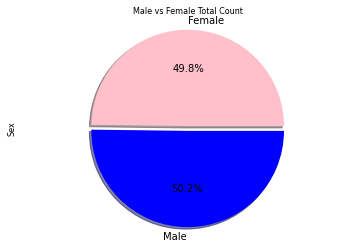

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot (more work *sigh*)

# Need labels for pie charts
labels = ["Female","Male"]

#Add values of percentages calculated earlier to print on pie chart
sizes = [49.799197,50.200803]

#Select color to use per sex
colors = ['pink', 'blue']

#Create small space between the two sexes
explode = (0.05, 0)

#Plotting and Plot Beautification
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title('Male vs Female Total Count',fontsize = 8)
plt.ylabel('Sex',fontsize = 8)
#Make my axis equal to each other
plt.axis("equal")
# Print Test
plt.show()

## Quartiles, Outliers and Boxplots

In [106]:
# Dataframe for all four successfull drug regimen
# capomulin_df = mouse_data_results_df.loc[mouse_data_results_df["Drug Regimen"] == "Capomulin",:]
# ramicane_df = mouse_data_results_df.loc[mouse_data_results_df["Drug Regimen"] == "Ramicane", :]
# infubinol_df = mouse_data_results_df.loc[mouse_data_results_df["Drug Regimen"] == "Infubinol", :]
# ceftamin_df = mouse_data_results_df.loc[mouse_data_results_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timept_df = pd.DataFrame(mouse_data_results_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={"Timepoint": "Greatest Timepoint"})
# Print test
greatest_timept_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timept_merge_df = pd.merge(mouse_data_results_df, greatest_timept_df, how="left", on='Mouse ID')
timept_merge_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [114]:
# Put treatments into a list for for loop (and later for plot labels)
success_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
success_drugs_list = []

# Loop through each drug regimen and calculate final tumor volume
for drug in success_drugs:
    
    new_df = timept_merge_df.loc[timept_merge_df['Drug Regimen'] == drug]

# Locate the rows which contain mice on each drug and get the tumor volumes 
# add subset     
# New dataframe to grab rows with the greatest timepoiont for each drug regimen
    final_vol_df = new_df.loc[new_df['Timepoint'] == new_df['Greatest Timepoint']]
    
# Final volume of each drug regimen
    values = final_vol_df['Tumor Volume (mm3)']
    success_drugs_list.append(values)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
# Quartiles calculation for each drug regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'The IQR for {drug} is: {iqr}')

# Determine outliers using upper and lower bounds    
# Upper and lower bounds. Any outliers?
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'The Lower Bound for {drug} is: {lower_bound}')
    print(f'The Upper Bound for {drug} is: {upper_bound}')
 # Count outliers
    outliers_count = (values.loc[(final_vol_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_vol_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'The Number of {drug} outliers is: {outliers_count}')


    

The IQR for Capomulin is: 7.781863460000004
The Lower Bound for Capomulin is: 20.70456164999999
The Upper Bound for Capomulin is: 51.83201549
The Number of Capomulin outliers is: 0
The IQR for Ramicane is: 9.098536719999998
The Lower Bound for Ramicane is: 17.912664470000003
The Upper Bound for Ramicane is: 54.30681135
The Number of Ramicane outliers is: 0
The IQR for Infubinol is: 11.477135160000003
The Lower Bound for Infubinol is: 36.83290494999999
The Upper Bound for Infubinol is: 82.74144559000001
The Number of Infubinol outliers is: 1
The IQR for Ceftamin is: 15.577752179999997
The Lower Bound for Ceftamin is: 25.355449580000002
The Upper Bound for Ceftamin is: 87.66645829999999
The Number of Ceftamin outliers is: 0


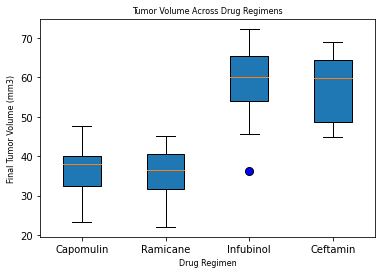

In [126]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flier = dict(marker='o', markerfacecolor='b', markersize=8, markeredgecolor='black')
drugs_regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
plt.boxplot(success_drugs_list, labels=drugs_regimen, patch_artist=True, flierprops=flier)
# Plot Beautification
plt.title('Tumor Volume Across Drug Regimens',fontsize =8)
plt.xlabel('Drug Regimen',fontsize = 8)
plt.ylabel('Final Tumor Volume (mm3)',fontsize = 8)
# Print test
plt.show()

## Line and Scatter Plots

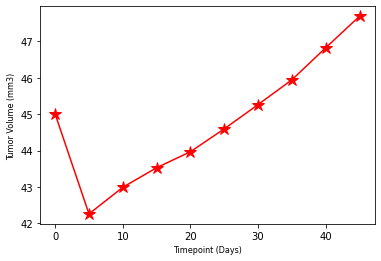

In [143]:
# Generate a line plot of tumor volume (y_axis) vs. time point (x_axis) for a mouse treated with Capomulin
# Mouse treated with Capomulin is: i557
# capomulin_df = mouse_data_results_df.loc[mouse_data_results_df["Drug Regimen"] == "Capomulin",:]
# capomulin_df

#Get info on mouse i557
mouse_i557 = mouse_data_results_df.loc[mouse_data_results_df['Mouse ID'] == 'i557']
# Print test
mouse_i557
plt.plot(mouse_i557['Timepoint'], mouse_i557["Tumor Volume (mm3)"], marker = '*', markersize=12, color='red')
# Plot Beautification
plt.xlabel('Timepoint (Days)',fontsize =8)
plt.ylabel('Tumor Volume (mm3)',fontsize =8)
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
